In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

In [4]:
# convert to -.5 to .5

In [5]:
X_train = X_train.astype('float32') / 255 - 0.5
X_test = X_test.astype('float32') / 255 - 0.5

In [6]:
noise_factor = 0.5

In [7]:
import numpy as np

In [8]:
# Add noise

In [9]:
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [10]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten

In [11]:
img_shape = X_train[0].shape

In [12]:
encoding_dim = 32

In [14]:
encoder = Sequential()
encoder.add(Input(img_shape))
encoder.add(Flatten())
encoder.add(Dense(encoding_dim))

In [15]:
import numpy as np

In [16]:
decoder = Sequential()
decoder.add(Input(encoding_dim))
decoder.add(Dense(np.prod(img_shape)))
decoder.add(Reshape(img_shape))

In [17]:
input_ = Input(img_shape)

In [18]:
# z
bottleneck = encoder(input_)
reconstruction = decoder(bottleneck)

In [19]:
autoencoder = Model(input_, reconstruction)

In [20]:
autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

In [22]:
checkpoints = ModelCheckpoint(
    filepath='model.h5',
    verbose=1,
    save_best_only=True
)

In [23]:
tb = TensorBoard(
    log_dir='./logs',
    write_graph=True
)

In [24]:
history = autoencoder.fit(
    X_train_noisy,
    X_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_noisy, X_test),
    verbose=1,
    callbacks=[checkpoints, tb]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.1238
Epoch 00001: val_loss improved from inf to 0.03812, saving model to model.h5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0710 - accuracy: 0.1241 - val_loss: 0.0381 - val_accuracy: 0.1822
Epoch 2/10
58112/60000 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.2037
Epoch 00002: val_loss improved from 0.03812 to 0.02913, saving model to model.h5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0330 - accuracy: 0.2043 - val_loss: 0.0291 - val_accuracy: 0.2171
Epoch 3/10
57856/60000 [===========================>..] - ETA: 0s - loss: 0.0280 - accuracy: 0.2249
Epoch 00003: val_loss improved from 0.02913 to 0.02650, saving model to model.h5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0280 - accuracy: 0.2251 - val_loss: 0.0265 - val_accuracy: 0.22

In [25]:
import matplotlib.pyplot as plt

In [26]:
def show(x):
    plt.imshow(np.clip(x+0.5, 0, 1))

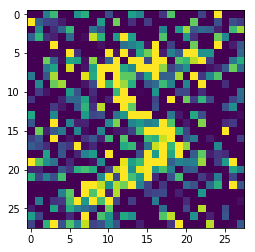

In [27]:
show(X_train_noisy[0])

In [28]:
output = autoencoder.predict(X_test[None][0])

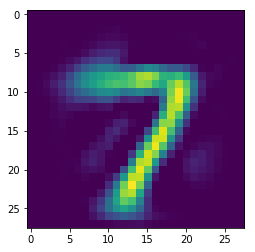

In [29]:
show(output[0])

In [30]:
def visualize(img, encoder, decoder):
    bottleneck = encoder.predict(img[None])[0]
    reconstruction = decoder.predict(bottleneck[None])[0]
    
    plt.subplot(1, 3, 1)
    show(img)
    
    plt.subplot(1, 3, 2)
    plt.imshow(bottleneck.reshape((bottleneck.shape[-1]//4, 4)))
    
    plt.subplot(1, 3, 3)
    plt.imshow(reconstruction)
    
    plt.show()

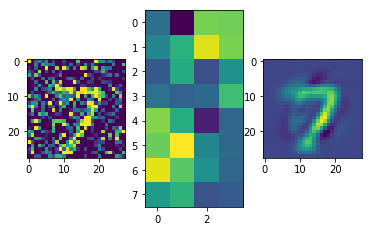

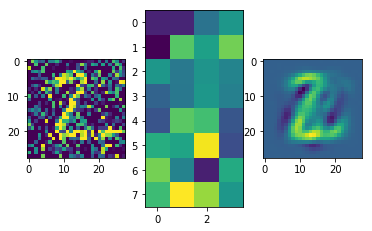

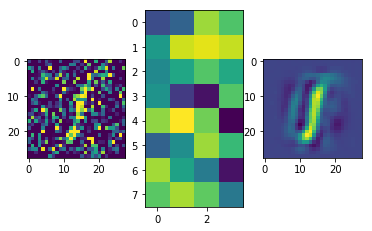

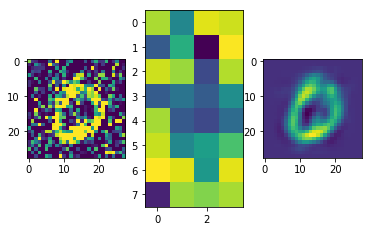

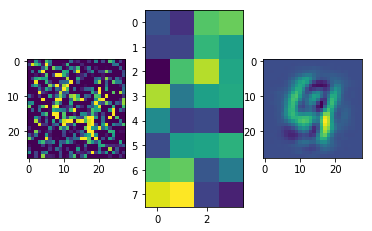

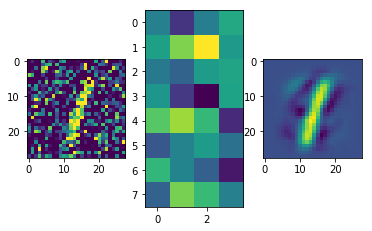

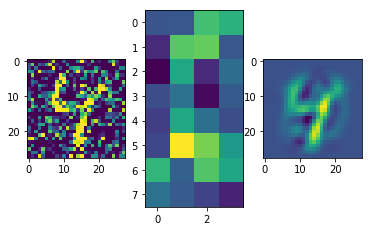

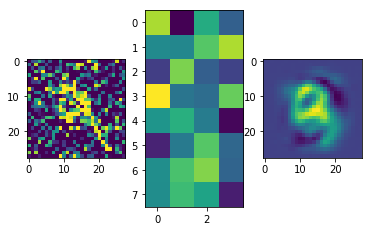

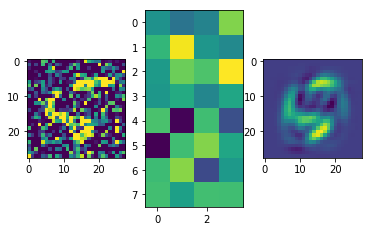

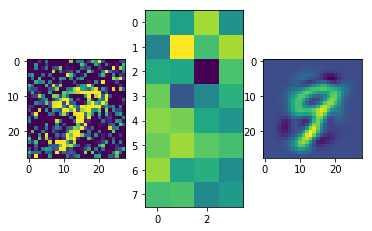

In [31]:
for i in range(10):
    img = X_test_noisy[i]
    visualize(img, encoder, decoder)